In [3]:
import pandas as pd

# Load the dataset
file_path = 'NY-House-Dataset.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows to understand the dataset structure
data_info = data.info()
data_head = data.head()
data_describe = data.describe()

data_info, data_head, data_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

(None,
                                          BROKERTITLE                TYPE  \
 0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
 1                                Brokered by Serhant      Condo for sale   
 2                             Brokered by Sowae Corp      House for sale   
 3                                Brokered by COMPASS      Condo for sale   
 4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   
 
        PRICE  BEDS       BATH  PROPERTYSQFT  \
 0     315000     2   2.000000        1400.0   
 1  195000000     7  10.000000       17545.0   
 2     260000     4   2.000000        2015.0   
 3      69000     3   1.000000         445.0   
 4   55000000     7   2.373861       14175.0   
 
                                              ADDRESS                    STATE  \
 0                               2 E 55th St Unit 803       New York, NY 10022   
 1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10

In [4]:
# Select relevant columns for analysis
data = data[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']]

# Check for any missing values in the selected columns
missing_values = data.isnull().sum()

# Calculate the median price to set up for classification target creation
median_price = data['PRICE'].median()

missing_values, median_price


(PRICE           0
 BEDS            0
 BATH            0
 PROPERTYSQFT    0
 LATITUDE        0
 LONGITUDE       0
 dtype: int64,
 825000.0)

In [5]:
from sklearn.model_selection import train_test_split

# Create the classification target column based on the median price
data['PRICE_CATEGORY'] = data['PRICE'].apply(lambda x: 'Above Median' if x >= median_price else 'Below Median')

# Prepare features and targets for regression and classification
# For regression: Use PRICE as the target
X_reg = data[['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']]
y_reg = data['PRICE']

# For classification: Use PRICE_CATEGORY as the target
X_clf = X_reg  # Features remain the same
y_clf = data['PRICE_CATEGORY']

# Split data into train and test sets (80% train, 20% test)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Shapes of the splits for reference
split_shapes = {
    "X_reg_train": X_reg_train.shape, "X_reg_test": X_reg_test.shape,
    "y_reg_train": y_reg_train.shape, "y_reg_test": y_reg_test.shape,
    "X_clf_train": X_clf_train.shape, "X_clf_test": X_clf_test.shape,
    "y_clf_train": y_clf_train.shape, "y_clf_test": y_clf_test.shape
}

split_shapes


{'X_reg_train': (3840, 5),
 'X_reg_test': (961, 5),
 'y_reg_train': (3840,),
 'y_reg_test': (961,),
 'X_clf_train': (3840, 5),
 'X_clf_test': (961, 5),
 'y_clf_train': (3840,),
 'y_clf_test': (961,)}

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize regression models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)

# Fit the models
lin_reg.fit(X_reg_train, y_reg_train)
tree_reg.fit(X_reg_train, y_reg_train)
forest_reg.fit(X_reg_train, y_reg_train)

# Make predictions on the test set
lin_reg_pred = lin_reg.predict(X_reg_test)
tree_reg_pred = tree_reg.predict(X_reg_test)
forest_reg_pred = forest_reg.predict(X_reg_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

lin_reg_metrics = evaluate_model(y_reg_test, lin_reg_pred)
tree_reg_metrics = evaluate_model(y_reg_test, tree_reg_pred)
forest_reg_metrics = evaluate_model(y_reg_test, forest_reg_pred)

lin_reg_metrics, tree_reg_metrics, forest_reg_metrics


({'MAE': 2332485.982379137,
  'MSE': 22108238713772.33,
  'R2': 0.12250906649450721},
 {'MAE': 1091037.7891085674,
  'MSE': 35685501031570.94,
  'R2': -0.41638164931236865},
 {'MAE': 943985.115782543,
  'MSE': 22220580349481.082,
  'R2': 0.11805015106185457})

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train models
lin_reg = LinearRegression().fit(X_reg_train, y_reg_train)
tree_reg = DecisionTreeRegressor(random_state=42).fit(X_reg_train, y_reg_train)
forest_reg = RandomForestRegressor(random_state=42).fit(X_reg_train, y_reg_train)

# Predictions
lin_reg_pred = lin_reg.predict(X_reg_test)
tree_reg_pred = tree_reg.predict(X_reg_test)
forest_reg_pred = forest_reg.predict(X_reg_test)

# Evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

lin_reg_metrics = evaluate_model(y_reg_test, lin_reg_pred)
tree_reg_metrics = evaluate_model(y_reg_test, tree_reg_pred)
forest_reg_metrics = evaluate_model(y_reg_test, forest_reg_pred)

print("Linear Regression:", lin_reg_metrics)
print("Decision Tree Regressor:", tree_reg_metrics)
print("Random Forest Regressor:", forest_reg_metrics)


Linear Regression: {'MAE': 2332485.982379137, 'MSE': 22108238713772.33, 'R2': 0.12250906649450721}
Decision Tree Regressor: {'MAE': 1091037.7891085674, 'MSE': 35685501031570.94, 'R2': -0.41638164931236865}
Random Forest Regressor: {'MAE': 943985.115782543, 'MSE': 22220580349481.082, 'R2': 0.11805015106185457}


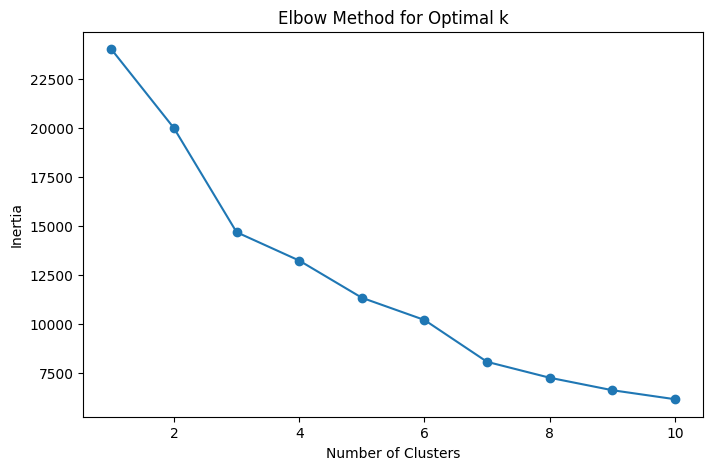

       PRICE  BEDS       BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  Cluster
0     315000     2   2.000000        1400.0  40.761255 -73.974483        0
1  195000000     7  10.000000       17545.0  40.766393 -73.980991        2
2     260000     4   2.000000        2015.0  40.541805 -74.196109        1
3      69000     3   1.000000         445.0  40.761398 -73.974613        0
4   55000000     7   2.373861       14175.0  40.767224 -73.969856        2


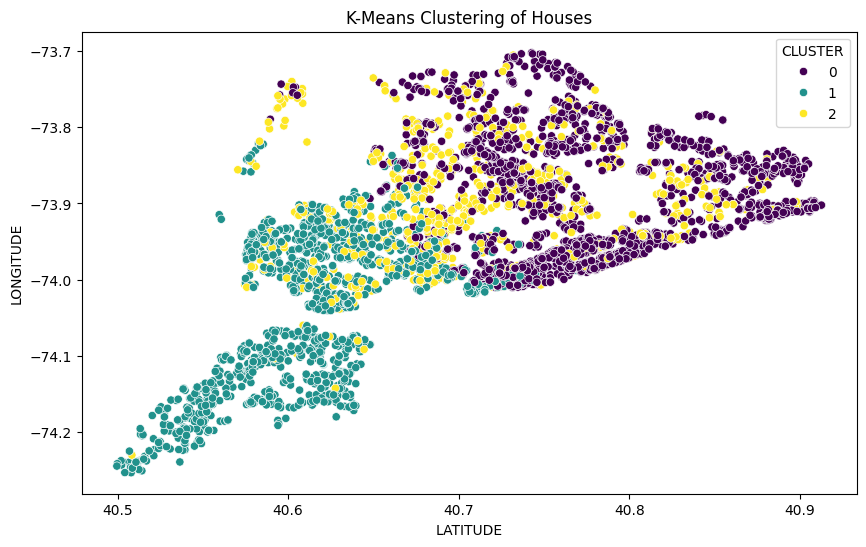


Silhouette Score for K-Means Clustering: 0.33925235781334345

--- Model Performance Summary ---

Regression Model Comparison:
Linear Regression - R-squared: 0.11110039437500985
Random Forest Regressor - R-squared: 0.24313801284291514
Best regression model: Random Forest Regressor

Classification Model Comparison:
Logistic Regression Accuracy: 0.7825182101977107
Random Forest Classifier Accuracy: 0.8928199791883454
Best classification model: Random Forest Classifier


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features relevant for clustering (e.g., location and size)
X_cluster = data[['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']]

# Standardize the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Elbow Method to determine the optimal number of clusters
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal k (e.g., k = 3 based on elbow point) and fit the KMeans model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Display the first few rows with the cluster labels
print(data[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'Cluster']].head())

# -----------------------------
# Clustering Model (Optional)
# -----------------------------

# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustered = data.drop(['PRICE', 'PRICE_CATEGORY'], axis=1)
data_scaled = scaler.fit_transform(data_clustered)
kmeans.fit(data_scaled)

# Adding cluster labels to the dataset
data['CLUSTER'] = kmeans.labels_

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='LATITUDE', y='LONGITUDE', hue='CLUSTER', palette='viridis')
plt.title("K-Means Clustering of Houses")
plt.show()

# Evaluate the clustering using silhouette score
print("\nSilhouette Score for K-Means Clustering:", silhouette_score(data_scaled, kmeans.labels_))

# -----------------------------
# Summary of Model Performance
# -----------------------------
print("\n--- Model Performance Summary ---")

print("\nRegression Model Comparison:")
print("Linear Regression - R-squared:", r2_score(y_test, y_pred_lr))
print("Random Forest Regressor - R-squared:", r2_score(y_test, y_pred_rf))
print("Best regression model: Random Forest Regressor" if r2_score(y_test, y_pred_rf) > r2_score(y_test, y_pred_lr) else "Best regression model: Linear Regression")

print("\nClassification Model Comparison:")
print("Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_log))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test_class, y_pred_rf_clf))
print("Best classification model: Random Forest Classifier" if accuracy_score(y_test_class, y_pred_rf_clf) > accuracy_score(y_test_class, y_pred_log) else "Best classification model: Logistic Regression")